In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 1. Read the dataset to the python environment.

In [3]:
data = pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [7]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# To check the null values
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

### 2. Do necessary pre-processing steps.

<AxesSubplot:xlabel='SL', ylabel='Density'>

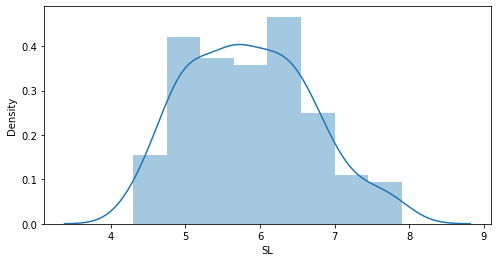

In [9]:
# Distribution plot of SL
fig,ax =plt.subplots(figsize=(8,4))
sns.distplot(data.SL)

In [10]:
# filling the missing values with median
data['SL'] = data['SL'].fillna(data['SL'].median())

<AxesSubplot:xlabel='SW', ylabel='Density'>

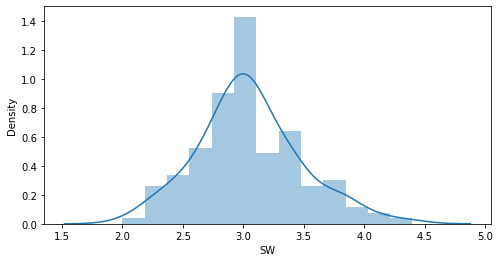

In [11]:
# Distribution plot of SW
fig,ax =plt.subplots(figsize=(8,4))
sns.distplot(data.SW)

In [12]:
# filling the missing values with median
data['SW'] = data['SW'].fillna(data['SW'].median())

<AxesSubplot:xlabel='PL', ylabel='Density'>

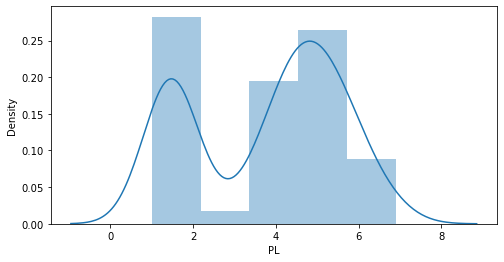

In [13]:
# Distribution plot of PL
fig,ax =plt.subplots(figsize=(8,4))
sns.distplot(data.PL)

In [14]:
# filling the missing values with mode
data['PL'] = data['PL'].fillna(data['PL'].median())

In [15]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

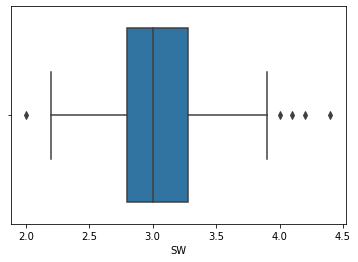

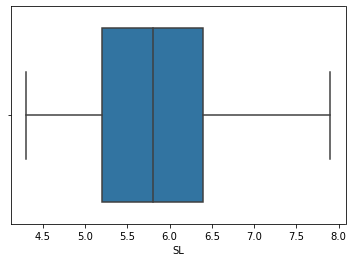

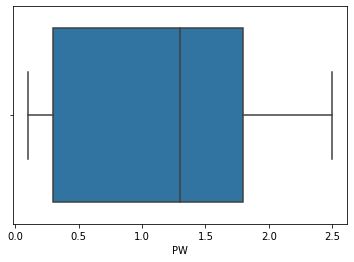

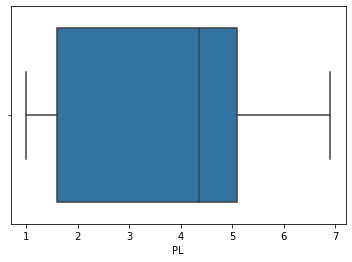

In [16]:
## checking outliers
for i in ['SW','SL', 'PW','PL']:
    #plt.title(i)
    sns.boxplot(x=data[i])
    plt.show() 

Ouliers found in SW feature and remove the outliers using percentile method.

<AxesSubplot:xlabel='SW'>

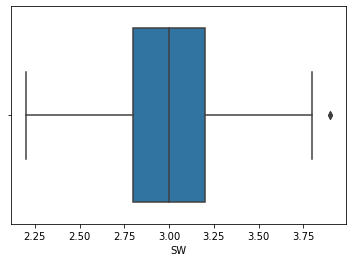

In [17]:
# Handling outlier using percentile
import numpy as np
q1 = np.percentile(data['SW'],25,interpolation='midpoint')
q3 = np.percentile(data['SW'],75,interpolation='midpoint')
IQR = q3-q1
low_limit=q1-1.5*IQR
high_limit=q3+1.5*IQR
index=data['SW'][(data['SW']<low_limit)|(data['SW']>high_limit)].index
data.drop(index,inplace=True)
sns.boxplot(x=data['SW'])

In [18]:
data.Classification.value_counts()

Iris-virginica     50
Iris-versicolor    49
Iris-setosa        46
Name: Classification, dtype: int64

### 3. Find out which classification model gives the best result to predict iris species.(also do random forest algorithm)

#### Label encoding to classification feature

In [19]:
#import label encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

#Encode labels in column 'Classification'.
data['Classification']= label_encoder.fit_transform(data['Classification'])

data['Classification'].unique()


array([0, 1, 2])

In [20]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Logistic Regression

In [21]:
# Splitting the dataset
x = data.drop(['Classification'],axis =1)
y = data['Classification']

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,test_size=0.25)

In [23]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred = logit_model.predict(x_test)

In [24]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [25]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,pos_label = 'positive',average='macro'))
print('Recallscore is:',recall_score(y_test,y_pred,pos_label = 'positive',average='macro'))
print('f1_score:',f1_score(y_test,y_pred,pos_label = 'positive',average='macro'))

Accuracy is: 0.8918918918918919
precision is: 0.8834498834498835
Recallscore is: 0.8915343915343915
f1_score: 0.8839506172839506


In [26]:
temp=[]
temp.append(['Logistic Regression',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),
             round(precision_score(y_test,y_pred,pos_label = 'positive',average='macro'),5),
             round(recall_score(y_test,y_pred,pos_label = 'positive',average='macro'),5)])

In [27]:
confusion_matrix(y_test,y_pred)

array([[13,  1,  0],
       [ 0,  8,  1],
       [ 0,  2, 12]], dtype=int64)

#### K - nearest neighbour model

In [28]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
acc_val=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    acc_val.append(acc)

Text(0, 0.5, 'accuracy')

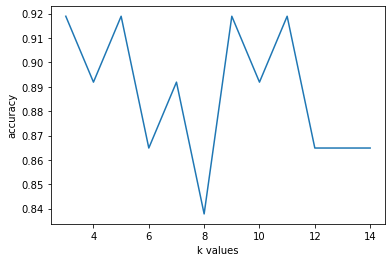

In [29]:
plt.plot(neighbors,acc_val)
plt.xlabel('k values')
plt.ylabel("accuracy")

In [30]:
#finding best k
best_k = neighbors[acc_val.index(max(acc_val))]
print("The optimal number of neighbors is %d." % best_k)

The optimal number of neighbors is 3.


In [31]:
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

In [32]:
print('Accuracy is:', accuracy_score(y_test,y_pred))
print('precision is:', precision_score(y_test,y_pred,pos_label = 'positive',average='macro'))
print('Recallscore is:', recall_score(y_test,y_pred,pos_label = 'positive',average='macro'))
print('f1_score:',f1_score(y_test,y_pred,pos_label = 'positive',average='macro'))

Accuracy is: 0.918918918918919
precision is: 0.9095238095238095
Recallscore is: 0.9153439153439153
f1_score: 0.9112132182307621


In [33]:
temp.append(['KNN',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),
             round(precision_score(y_test,y_pred,pos_label = 'positive',average='macro'),5),
             round(recall_score(y_test,y_pred,pos_label = 'positive',average='macro'),5)])

#### SVM

In [34]:
#SVM
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

In [35]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.918918918918919
precision is : 0.9076923076923077
recall is : 0.9153439153439153
F1 score is : 0.9103313840155945


In [36]:
temp.append(['Linear Svm',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),
             round(precision_score(y_test,y_pred,pos_label = 'positive',average='macro'),5),
             round(recall_score(y_test,y_pred,pos_label = 'positive',average='macro'),5)])

In [37]:
## polynomial svm
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

In [38]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9407407407407407
recall is : 0.9391534391534391
F1 score is : 0.9391230310770541


In [39]:
temp.append(['polynomial svm',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),
             round(precision_score(y_test,y_pred,pos_label = 'positive',average='macro'),5),
             round(recall_score(y_test,y_pred,pos_label = 'positive',average='macro'),5)])

In [40]:
## radial svm
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

In [41]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))


accuracy is : 0.8648648648648649
precision is : 0.861111111111111
recall is : 0.8677248677248678
F1 score is : 0.8570071903405238


In [42]:
temp.append(['Radial Svm',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),
             round(precision_score(y_test,y_pred,pos_label = 'positive',average='macro'),5),
             round(recall_score(y_test,y_pred,pos_label = 'positive',average='macro'),5)])

#### RANDOM FOREST

In [43]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rm=RandomForestClassifier()
rm.fit(x_train,y_train)
y_pred=rm.predict(x_test)

In [44]:
print("accuracy is :",accuracy_score(y_test,y_pred))
print("precision is :",precision_score(y_test,y_pred,average='macro'))
print("recall is :",recall_score(y_test,y_pred,average='macro'))
print("F1 score is :",f1_score(y_test,y_pred,average='macro'))

accuracy is : 0.9459459459459459
precision is : 0.9391534391534391
recall is : 0.9391534391534391
F1 score is : 0.9391534391534391


In [45]:
temp.append(['Random forest',round(f1_score(y_test,y_pred,average='macro'),5),round(accuracy_score(y_test,y_pred),5),
             round(precision_score(y_test,y_pred,pos_label = 'positive',average='macro'),5),
             round(recall_score(y_test,y_pred,pos_label = 'positive',average='macro'),5)])

In [46]:
df1 = pd.DataFrame(temp, columns = ['Algorithms', 'F1-Score','accuracy','precision','recall'])
df1

,Algorithms,F1-Score,accuracy,precision,recall
0,Logistic Regression,0.88395,0.89189,0.88345,0.89153
1,KNN,0.91121,0.91892,0.90952,0.91534
2,Linear Svm,0.91033,0.91892,0.90769,0.91534
3,polynomial svm,0.93912,0.94595,0.94074,0.93915
4,Radial Svm,0.85701,0.86486,0.86111,0.86772
5,Random forest,0.93915,0.94595,0.93915,0.93915


 ####  Random Forest has highest F1 score (0.93915) and accuracy(0.94595) than other algorithms.Also polynomial Svm has F1 - score (0.9312) and accuracy(0.94595).